# Supplementary Figure S4 S5
Distribution of repetitive elements in the WS270 genome

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Read GFF3 file into a pandas DataFrame
def read_gff3(file_path):
    gff_data = pd.read_csv(file_path, sep='\t', comment='#', header=None)
    gff_data.columns = ['chromosome', 'source', 'feature', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
    return gff_data


def filter_features(gff_data, feature):
    """Filter GFF3 data based on feature type."""
    return gff_data[gff_data['feature'] == feature]

def plot_density(gff_data_transposons, gff_data_low_complexity):
    """Plot the density of transposons and low complexity DNA on chromosomes."""
    
    # Create the plot for transposons
    plt.figure(figsize=(12, 8))
    g = sns.FacetGrid(gff_data_transposons, col="chromosome", col_wrap=3, height=4, aspect=1.5)
    g.map(sns.histplot, "start", kde=True, color="blue", alpha=0.7)
    g.set_axis_labels("Position on Chromosome", "Density")
    g.set_titles("{col_name} Chromosome")
    g.fig.suptitle("Density of Transposons on C. elegans Chromosomes", fontsize=16)
    
    # Set x-axis limits based on chromosome length and exclude MtDNA
    for ax, chromosome in zip(g.axes.flat, gff_data_transposons['chromosome'].unique()):
        if chromosome != "MtDNA" and chromosome in chromosome_lengths:
            ax.set_xlim(0, chromosome_lengths[chromosome])
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    plt.savefig("transposon_density.png", dpi=300)
    
    # Create the plot for low complexity DNA
    plt.figure(figsize=(12, 8))
    g = sns.FacetGrid(gff_data_low_complexity, col="chromosome", col_wrap=3, height=4, aspect=1.5)
    g.map(sns.histplot, "start", kde=True, color="red", alpha=0.7)
    g.set_axis_labels("Position on Chromosome", "Density")
    g.set_titles("{col_name} Chromosome")
    g.fig.suptitle("Density of Low Complexity DNA on C. elegans Chromosomes", fontsize=16)
    
    # Set x-axis limits based on chromosome length and exclude MtDNA
    for ax, chromosome in zip(g.axes.flat, gff_data_low_complexity['chromosome'].unique()):
        if chromosome != "MtDNA" and chromosome in chromosome_lengths:
            ax.set_xlim(0, chromosome_lengths[chromosome])
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    plt.savefig("low_complexity_density.png", dpi=300)
    
    plt.show()
    



/Users/ayush/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 864x576 with 0 Axes>

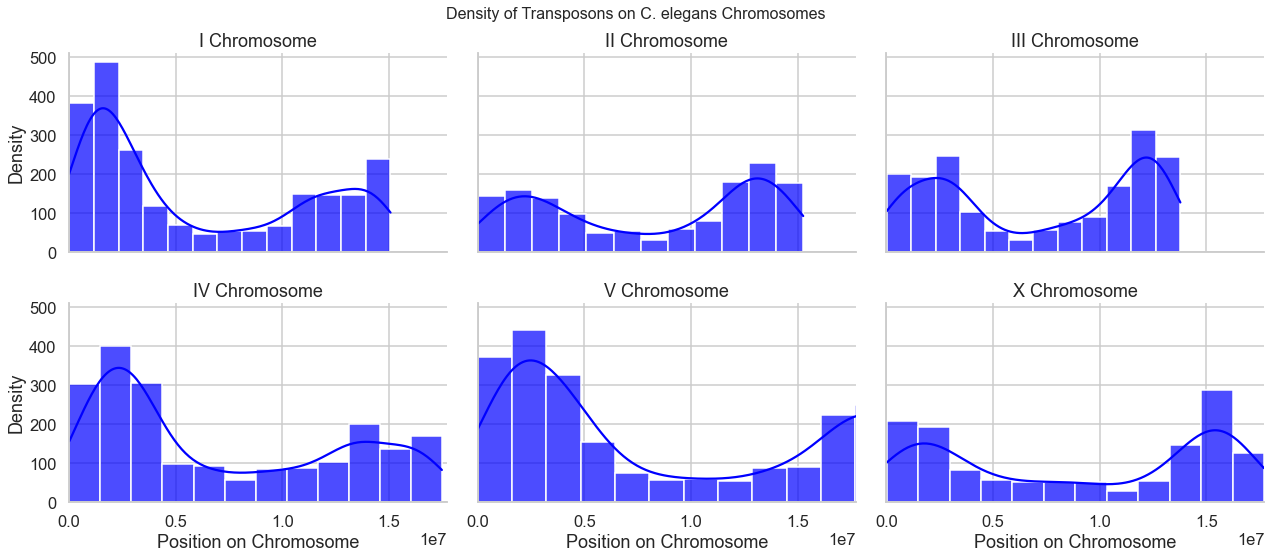

<Figure size 864x576 with 0 Axes>

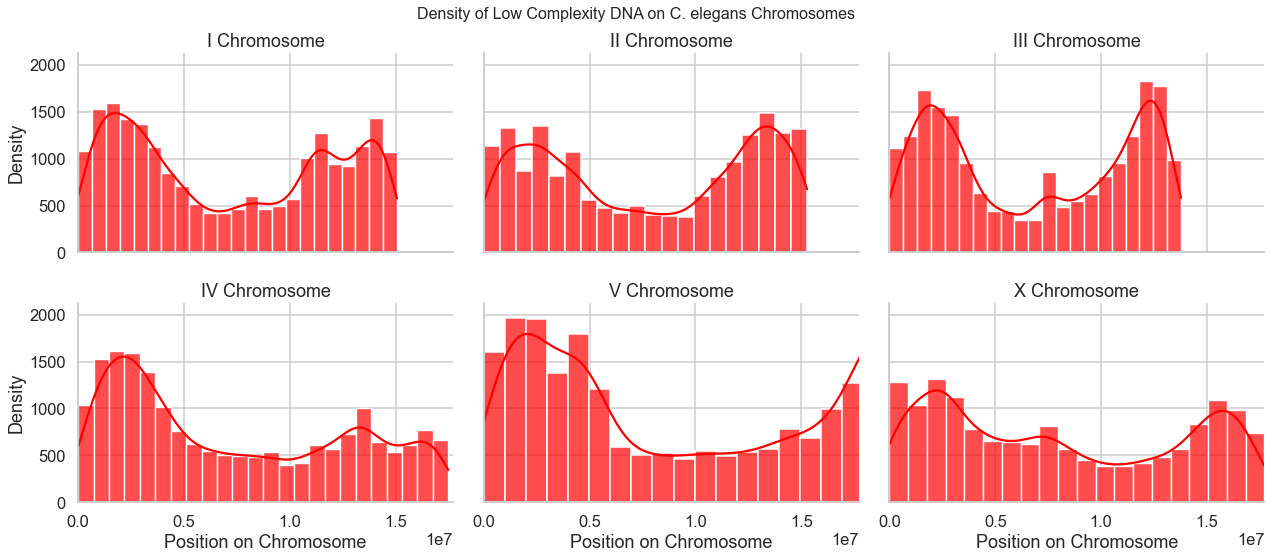

In [ ]:
# Main
chromosome_lengths = {
    "I": 15072434, "II": 15279421, "III": 13783801,
    "IV": 17493829, "V": 20924149, "X": 17718942
}
    
file_path = '/Users/ayush/Desktop/SV_MA/blue/Reference/WS270/c_elegans.PRJNA13758.WS270.annotations.gff3'  # Download this file here https://downloads.wormbase.org/species/c_elegans/PRJNA13758/gff/c_elegans.PRJNA13758.WS270.annotations.gff3.gz
gff_data = read_gff3(file_path)

# Remove rows where chromosome is MtDNA (early filtering)
gff_data = gff_data[gff_data['chromosome'] != "MtDNA"]

# Assuming gff_data is your loaded DataFrame from GFF3
gff_data_transposons = filter_features(gff_data, 'transposable_element')
gff_data_low_complexity = filter_features(gff_data, 'repeat_region')

# Plot densities
plot_density(gff_data_transposons, gff_data_low_complexity)